# Визуализация данных

**План:**

1. pandas - организация данных
2. Matplotlib
3. Seaborn
4. Wordcloud

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23

**Обычный график**

Точки по х и у соединены линиями. Нужен, если есть однозначное соответствие х и у и мы хотим показать как при изменении х меняется у. Например, по х может быть время, а по у - частотность слова (как на графиках в НКРЯ).

X: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Y: [11, 19, 59, 77, 90, 80, 107, 122, 150, 95]


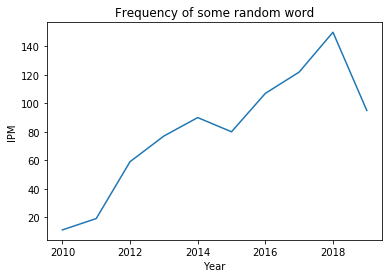

In [2]:
X = list(range(2010, 2020))
Y = [random.randint(i*10, (i+1)*20) for i in range(len(X))]
print('X:', X)
print('Y:', Y)

plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.title('Frequency of some random word') # заголовок
plt.ylabel('IPM') # подпись оси Х
plt.xlabel('Year') # подпись оси Y
plt.show()

**Scatter plot**

Точки, как и раньше, задаются по х и у, но теперь не соединяются линиями. Такие гарфики используются для отображения наблюдений в эксперименте, когда есть два параметра, которые могут принимать различные значения и нужно показать, какие комюбинации есть и как они раположены.

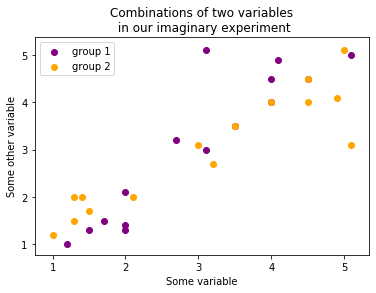

In [3]:
X = [1.2, 2, 3.1, 4, 5.1, 1.7, 1.5, 3.5, 4.5, 4, 2, 2, 2.7, 3.1, 4.1]
Y = [1, 1.4, 3, 4, 5, 1.5, 1.3, 3.5, 4.5, 4.5, 1.3, 2.1, 3.2, 5.1, 4.9]

plt.scatter(X, Y, color='purple', label='group 1') # меняем цвет, добавляем label
plt.scatter(Y, X, color='orange', label='group 2') # нарисуем еще какие-то значения на том же графике
plt.title('Combinations of two variables\n in our imaginary experiment') # перенос строки
plt.ylabel('Some other variable')
plt.xlabel('Some variable')
plt.legend(loc='best') # автоматический поиск места для легенды
plt.show()

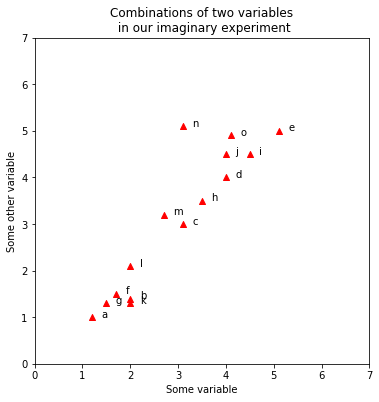

In [4]:
X = [1.2, 2, 3.1, 4, 5.1, 1.7, 1.5, 3.5, 4.5, 4, 2, 2, 2.7, 3.1, 4.1]
Y = [1, 1.4, 3, 4, 5, 1.5, 1.3, 3.5, 4.5, 4.5, 1.3, 2.1, 3.2, 5.1, 4.9]
labels = 'abcdefghijklmno'
plt.figure(figsize=(6, 6)) # размер графика
plt.scatter(X, Y, color='red', label='group 1', marker='^') # маркер - треугольник
for x, y, key in zip(X, Y, range(len(X))):
    plt.text(x+0.2, y, labels[key]) # подписи
plt.title('Combinations of two variables\n in our imaginary experiment')
plt.ylabel('Some other variable')
plt.xlabel('Some variable')
plt.xlim((0, 7)) # предел по х
plt.ylim((0, 7)) # предел по у
plt.show()

**Bar plot**

Столбчатая диграмма - для категориальных данных по х и чисел по у, например, если у нас есть дни недели и среднее количество ругательств, которое человек произносит в этот день.

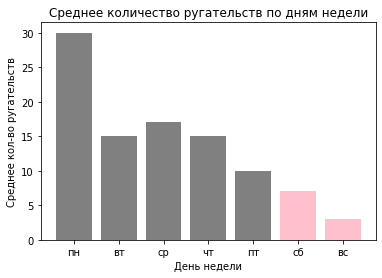

In [5]:
X = [1, 2, 3, 4, 5]
X2 = [6, 7] # сделаем выходные отдельно
Y = [30, 15, 17, 15, 10]
Y2 = [7, 3]
DAYS = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']
plt.bar(X, Y, color='grey')
plt.bar(X2, Y2, color='pink')
plt.xticks(ticks=X+X2, labels=DAYS)
plt.title('Среднее количество ругательств по дням недели')
plt.ylabel('Среднее кол-во ругательств')
plt.xlabel('День недели')
plt.show()

**Heatmap**

Хитмэп нужен, когда у нас есть 3 переменные.

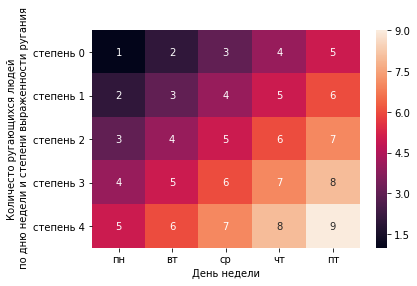

In [35]:
X = [
    [1, 2, 3, 4, 5],
    [2, 3, 4, 5, 6],
    [3, 4, 5, 6, 7],
    [4, 5, 6, 7, 8],
    [5, 6, 7, 8, 9],
]
sns.heatmap(
    X, # матрица значений
    annot=True, # значения из матрицы
    xticklabels=DAYS[:5],
    yticklabels=[f'степень {i}' for i in range(0, 5)]
)
plt.xlabel('День недели')
plt.ylabel('Степень выраженности ругания')
plt.ylabel('Количесто ругающихся людей\n по дню недели и степени выраженности ругания')
plt.show()

## Pandas

In [6]:
import pandas as pd

In [18]:
tolstoy = pd.read_csv('tolstoy.csv', sep='\t').fillna('') # читаем файл и пустые значения заполняем пустыми строками

In [19]:
tolstoy.head(10)

,lex,word,POS,time,gender,case,number,verbal,adj_form,comp,...,имя,отч,фам,вводн,гео,сокр,обсц,разг,редк,устар
0,том,том,S,,муж,вин,ед,,,,...,,,,,,,,,,
1,первый,первый,ANUM,,муж,вин,ед,,,,...,,,,,,,,,,
2,часть,часть,S,,жен,вин,ед,,,,...,,,,,,,,,,
3,первый,первая,ANUM,,жен,им,ед,,,,...,,,,,,,,,,
4,ну,ну,PART,,,,,,,,...,,,,,,,,,,
5,здравствовать,здравствуйте,V,,,,мн,пов,,,...,,,,,,,,,,
6,здравствовать,здравствуйте,V,,,,мн,пов,,,...,,,,,,,,,,
7,садиться,садитесь,V,непрош,,,мн,изъяв,,,...,,,,,,,,,,
8,и,и,CONJ,,,,,,,,...,,,,,,,,,,
9,рассказывать,рассказывайте,V,,,,мн,пов,,,...,,,,,,,,,,


In [20]:
tolstoy['gender'].value_counts()

        107839
муж      56781
жен      33320
сред     18063
мж          96
Name: gender, dtype: int64

In [21]:
tolstoy[tolstoy['gender'] == 'мж']['lex'].value_counts().head(10)

лаврушка       17
браунау        11
душенька        6
бедняжка        5
моро            5
судья           5
староста        3
плакса          3
бондаренко      2
сорвиголова     2
Name: lex, dtype: int64

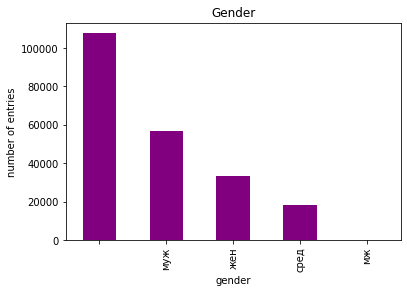

In [22]:
tolstoy['gender'].value_counts().plot.bar(color='purple'); # барплот сразу из датафрейма
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries');

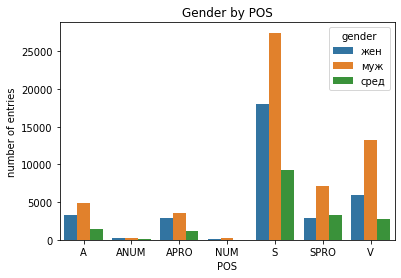

In [23]:
df2 = tolstoy[
    (tolstoy['gender'] != '') & (tolstoy['gender'] != 'мж')
][
    ['POS', 'gender', 'number']
].groupby(['POS', 'gender'], as_index=False).count()

df2.columns = ['POS', 'gender', 'total']
sns.barplot(x="POS", y="total", hue='gender', data=df2)
plt.title('Gender by POS')
plt.xlabel('POS')
plt.ylabel('number of entries');

**Pie chart**

Таким образом удобно визуализировать доли, которые занимают категории внтури целого, однако нужно аккуратно использовать этот вид графиков, потому что они могут ввести в заблуждение при небольшом количестве данных или при сравнении групп.

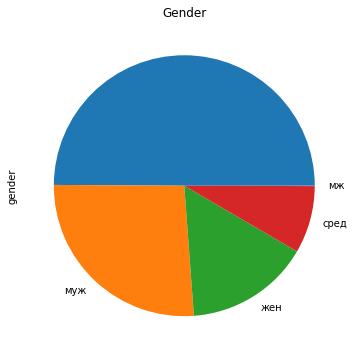

In [24]:
plt.figure(figsize=(6, 6))
tolstoy['gender'].value_counts().plot(kind='pie');
plt.title('Gender');

In [25]:
df2 = tolstoy[['lex', 'POS', 'gender']].groupby(['lex', 'POS'], as_index=False).count()
df2.columns = ['lex', 'POS', 'total']
df2 = df2[df2['total'] > 10]

**Box plot**

Боксплоты нужны для того, чтобы показать различия в распределениях в разныз группах, например, если у нас есть части речи и разные частоты лемм этих частей речи.

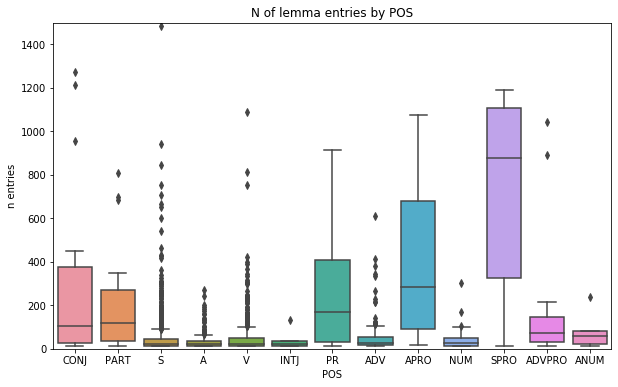

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="POS", y="total", data=df2)
plt.ylim((0, 1500))
plt.title('N of lemma entries by POS')
plt.ylabel('n entries')
plt.xlabel('POS');

**Гистограмма**

Главное отличие гистограммы от барплота - на гистограмме у нас одна переменная и мы хотим изучить только ее: сколько объектов с тем или иным значением (в промежуке значений), а барплот - это значения по категориям.

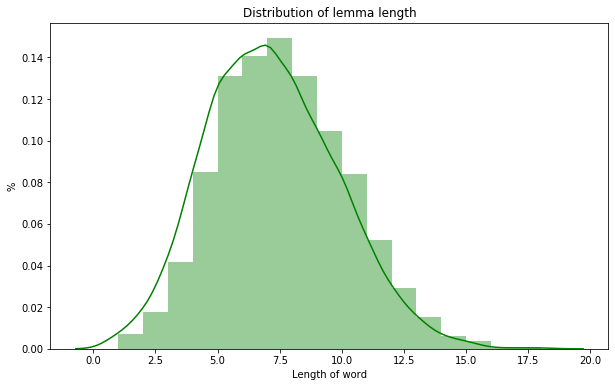

In [27]:
df2['length'] = df2['lex'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df2['length'], bins=17, color='green')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word');